# Task 20->Feature Engineering

## Setting Data Files Names

In [1]:
FILE_PATH_FE_CREDIT_CUSTOMERS = "FE_credit_customers.csv"
FILE_PATH_CARS = "categorical_dataset_cars.csv"
FILE_PATH_FRAUD_DETECTION = "numerical_dataset_fraud_detection_bank_dataset.csv"

## Importing necessary libraries

In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif, chi2, SelectKBest, f_classif, VarianceThreshold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler, PolynomialFeatures, LabelEncoder, OneHotEncoder, Normalizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectPercentile, SelectFpr

# Task 1: Feature Selection

In [3]:
print("\n--- Task 1: Feature Selection ---")
df = pd.read_csv(FILE_PATH_FE_CREDIT_CUSTOMERS)


--- Task 1: Feature Selection ---


### First 5 Rows

In [4]:
print("Dataset Head:\n")
df.head()

Dataset Head:



,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


### Information of Dataset

In [5]:
print("Dataset Info:\n")
df.info()

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 10

### Description of Dataset

In [6]:
print("Dataset Description:\n")
df.describe(include='all')

Dataset Description:



,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
count,1000,1000.000000,1000,1000,1000.000000,1000,1000,1000.000000,1000,1000,...,1000,1000.000000,1000,1000,1000.000000,1000,1000.000000,1000,1000,1000
unique,4,NaN,5,10,NaN,5,5,NaN,4,3,...,4,NaN,3,3,NaN,4,NaN,2,2,2
top,no checking,NaN,existing paid,radio/tv,NaN,<100,1<=X<4,NaN,male single,none,...,car,NaN,none,own,NaN,skilled,NaN,none,yes,good
freq,394,NaN,530,280,NaN,603,339,NaN,548,907,...,332,NaN,814,713,NaN,630,NaN,596,963,700
mean,NaN,20.903000,NaN,NaN,3271.258000,NaN,NaN,2.973000,NaN,NaN,...,NaN,35.546000,NaN,NaN,1.407000,NaN,1.155000,NaN,NaN,NaN
std,NaN,12.058814,NaN,NaN,2822.736876,NaN,NaN,1.118715,NaN,NaN,...,NaN,11.375469,NaN,NaN,0.577654,NaN,0.362086,NaN,NaN,NaN
min,NaN,4.000000,NaN,NaN,250.000000,NaN,NaN,1.000000,NaN,NaN,...,NaN,19.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN
25%,NaN,12.000000,NaN,NaN,1365.500000,NaN,NaN,2.000000,NaN,NaN,...,NaN,27.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN
50%,NaN,18.000000,NaN,NaN,2319.500000,NaN,NaN,3.000000,NaN,NaN,...,NaN,33.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN
75%,NaN,24.000000,NaN,NaN,3972.250000,NaN,NaN,4.000000,NaN,NaN,...,NaN,42.000000,NaN,NaN,2.000000,NaN,1.000000,NaN,NaN,NaN


### Displaying Columns of Datasets

In [7]:
print("Column Names:\n")
df.columns

Column Names:



Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

### Identify the target column (assuming it's 'class')

In [8]:
target_column = 'class'
if target_column not in df.columns:
    print(f"Warning: '{target_column}' not found in the dataset. Available columns are:")
    print(df.columns)
    target_column = df.columns[-1]
    print(f"Using '{target_column}' as the target column instead.")

## Handle missing values

In [9]:
print("Missing Values Before:\n")
df.isnull().sum()

Missing Values Before:



checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

I checked for missing values to ensure data quality. Since no missing values are reported, no further action is needed.

## Separate features and target

In [10]:
X = df.drop(columns=[target_column])
y = df[target_column]

## Encode the target variable

In [11]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

## Handle categorical variables in features

In [12]:
X_encoded = pd.get_dummies(X)

## Split the data

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)
print("\n--- SPLITTING DATA ---")
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")


--- SPLITTING DATA ---
Training set shape: (800, 61)
Testing set shape: (200, 61)


## Analyze correlations between numeric features

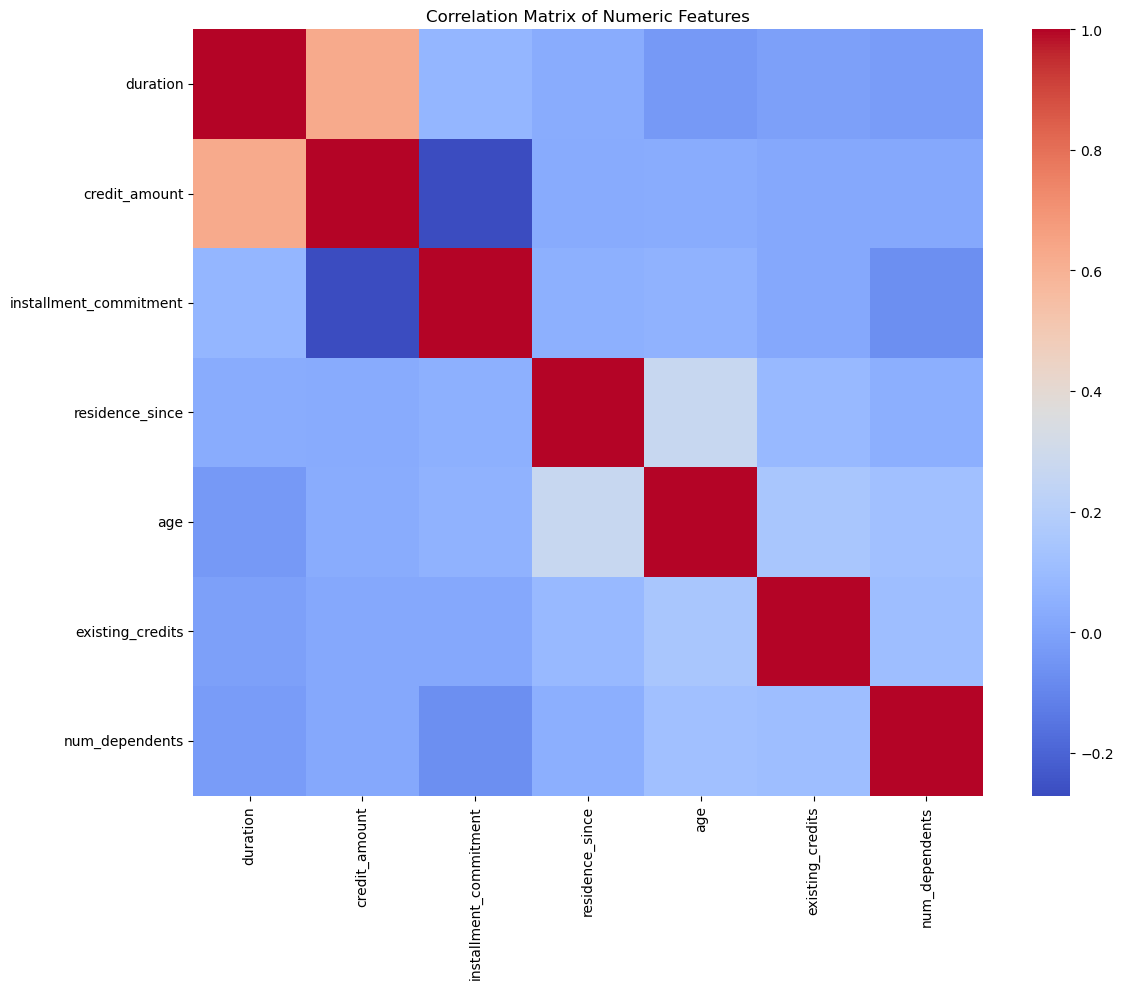

In [14]:
numeric_features = X_encoded.select_dtypes(include=[np.number]).columns
correlation_matrix = X_encoded[numeric_features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Matrix of Numeric Features")
plt.tight_layout()
plt.show()

This graph shows a correlation matrix heatmap of numeric features, likely from a dataset related to credit or loan applications. The heatmap uses a color scale ranging from dark blue (strong negative correlation) through white (no correlation) to dark red (strong positive correlation).

## Key observations from the heatmap:

### 1. Strong positive correlations:

Duration and credit_amount show a moderately strong positive correlation.
Stallment_commitment and credit_amount have a strong positive correlation.


### 2. Moderate positive correlations:

Age and residence_since show a moderate positive correlation.


### 3. Weak to moderate negative correlations:

Num_dependents shows weak to moderate negative correlations with most other features, particularly with age.
Existing_credits has weak negative correlations with several features.


### 4. No strong correlations:

Residence_since doesn't show strong correlations with most features except age.
Existing_credits and num_dependents don't have strong correlations with most other features.


### 5. The diagonal of the matrix shows perfect correlation (dark red) as expected, since each feature correlates perfectly with itself.
### 6. The matrix is symmetrical, as correlation between A and B is the same as between B and A.

### 1. Correlation Coefficient

In [15]:
print("\n--- Correlation Coefficient ---")
print("Top correlated numeric features:")
correlation_threshold = 0.5  # Adjust this threshold as needed
high_corr_features = correlation_matrix.abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
high_corr_features = high_corr_features[
    (high_corr_features['level_0'] != high_corr_features['level_1']) & 
    (high_corr_features[0] >= correlation_threshold)
]
print(high_corr_features)


--- Correlation Coefficient ---
Top correlated numeric features:
         level_0        level_1         0
7  credit_amount       duration  0.624984
8       duration  credit_amount  0.624984


The table lists pairs of features with a high correlation coefficient (≥ 0.5). Specifically, "credit_amount" and "duration" have a correlation coefficient of 0.624984. This positive correlation indicates that as one of these features increases, the other tends to increase as well. The correlation is symmetric, meaning the coefficient between "duration" and "credit_amount" is the same, as expected. The threshold effectively filters out less significant correlations, focusing on those with stronger relationships.

### 2. Variance Threshold

In [16]:
print("\n--- Variance Threshold ---")
selector = VarianceThreshold(threshold=0.1)  # Adjust this threshold as needed
X_high_variance = selector.fit_transform(X_train)
high_variance_features = X_train.columns[selector.get_support()].tolist()
print(f"Number of features after variance thresholding: {X_high_variance.shape[1]}")
print(f"Removed {X_train.shape[1] - X_high_variance.shape[1]} low-variance features")


--- Variance Threshold ---
Number of features after variance thresholding: 36
Removed 25 low-variance features


Output of the VarianceThreshold feature selection indicates that after applying a variance threshold of 0.1, the dataset was reduced from its original number of features to 36. Specifically, 25 features with variance below this threshold were removed. This means that these 25 features did not contribute significant variability to the dataset, which can be beneficial for reducing dimensionality and improving model performance by focusing on more informative features. This process helps streamline the dataset and potentially enhances the efficiency and effectiveness of subsequent modeling steps.

### 3. Mutual Information

In [17]:
print("\n--- Mutual Information ---")
mi_selector = SelectPercentile(mutual_info_classif, percentile=20)  # Select top 20% features
mi_selector.fit(X_train, y_train)
mi_scores = pd.Series(mi_selector.scores_, index=X_train.columns)
mi_selected_features = X_train.columns[mi_selector.get_support()].tolist()
print(f"Selected {len(mi_selected_features)} features based on Mutual Information")
print("Top 10 features:")
print(mi_scores.nlargest(10))


--- Mutual Information ---
Selected 12 features based on Mutual Information
Top 10 features:
checking_status_no checking           0.064980
checking_status_0<=X<200              0.035568
personal_status_female div/dep/mar    0.032601
savings_status_>=1000                 0.027584
duration                              0.026601
housing_rent                          0.026520
credit_history_no credits/all paid    0.026169
property_magnitude_real estate        0.025882
checking_status_<0                    0.025169
purpose_used car                      0.019448
dtype: float64


The Mutual Information analysis was performed to select features that have the highest relevance for predicting the target variable. Out of all features, 12 were identified based on their mutual information scores. The top 10 features with the highest scores include checking_status_no checking with a score of 0.06498, indicating its strong association with the target variable. Other notable features include checking_status_0<=X<200 and personal_status_female div/dep/mar, which also have relatively high scores. These selected features are deemed the most informative and likely to contribute significantly to the model's predictive performance.

### 4. Chi-Square Test

In [18]:
print("\n--- Chi-Square Test ---")
chi2_selector = SelectPercentile(chi2, percentile=20)  # Select top 20% features
chi2_selector.fit(X_train, y_train)
chi2_scores = pd.Series(chi2_selector.scores_, index=X_train.columns)
chi2_selected_features = X_train.columns[chi2_selector.get_support()].tolist()
print(f"Selected {len(chi2_selected_features)} features based on Chi-Square Test")
print("Top 10 features:")
print(chi2_scores.nlargest(10))


--- Chi-Square Test ---
Selected 12 features based on Chi-Square Test
Top 10 features:
credit_amount                                    53217.626054
duration                                           215.084352
age                                                 56.500356
checking_status_no checking                         43.371880
checking_status_<0                                  36.470703
credit_history_no credits/all paid                  21.059968
credit_history_critical/other existing credit       20.134903
credit_history_all paid                             13.921251
property_magnitude_no known property                11.091575
property_magnitude_real estate                      10.714302
dtype: float64


The Chi-Square Test was applied to select the top 20% of features from the dataset based on their significance. As a result, 12 features were identified as significant. The top 10 features, ranked by their Chi-Square scores, include credit_amount, duration, and age with the highest scores, indicating their strong association with the target variable. Features such as checking_status_no checking and credit_history_no credits/all paid also show high relevance. The scores reflect the contribution of these features to explaining the variance in the target variable, with credit_amount being the most influential. This selection helps in reducing dimensionality while retaining the most impactful features for modeling.

### 5. ANOVA F-test

In [19]:
print("\n--- ANOVA F-test ---")
f_selector = SelectPercentile(f_classif, percentile=20)  # Select top 20% features
f_selector.fit(X_train, y_train)
f_scores = pd.Series(f_selector.scores_, index=X_train.columns)
f_selected_features = X_train.columns[f_selector.get_support()].tolist()
print(f"Selected {len(f_selected_features)} features based on ANOVA F-test")
print("Top 10 features:")
print(f_scores.nlargest(10))


--- ANOVA F-test ---
Selected 12 features based on ANOVA F-test
Top 10 features:
checking_status_no checking                      79.816687
checking_status_<0                               52.961000
duration                                         33.885220
credit_history_critical/other existing credit    29.435208
credit_history_no credits/all paid               22.590335
credit_amount                                    21.848023
housing_own                                      21.195914
age                                              15.711927
property_magnitude_real estate                   15.018843
credit_history_all paid                          14.850252
dtype: float64


The ANOVA F-test output reveals that 12 features were selected based on their significance to the target variable. The top features are ranked by their F-scores, which measure the variance between groups relative to the variance within groups. The most influential feature is checking_status_no checking, with an F-score of 79.82, indicating a strong association with the target variable. Other notable features include checking_status_<0, duration, and credit_history_critical/other existing credit, each with substantial F-scores. These top features provide insight into which aspects of the dataset are most predictive of the target, helping focus on the most relevant features for modeling.

## False Positive Rate feature selection

In [20]:
print("\n--- False Positive Rate Feature Selection ---")
fpr_selector = SelectFpr(alpha=0.05)  # Using 5% significance level
fpr_selector.fit(X_train, y_train)
fpr_selected_features = X_train.columns[fpr_selector.get_support()].tolist()
print(f"Selected {len(fpr_selected_features)} features based on False Positive Rate")


--- False Positive Rate Feature Selection ---
Selected 30 features based on False Positive Rate


## Visualize feature importance

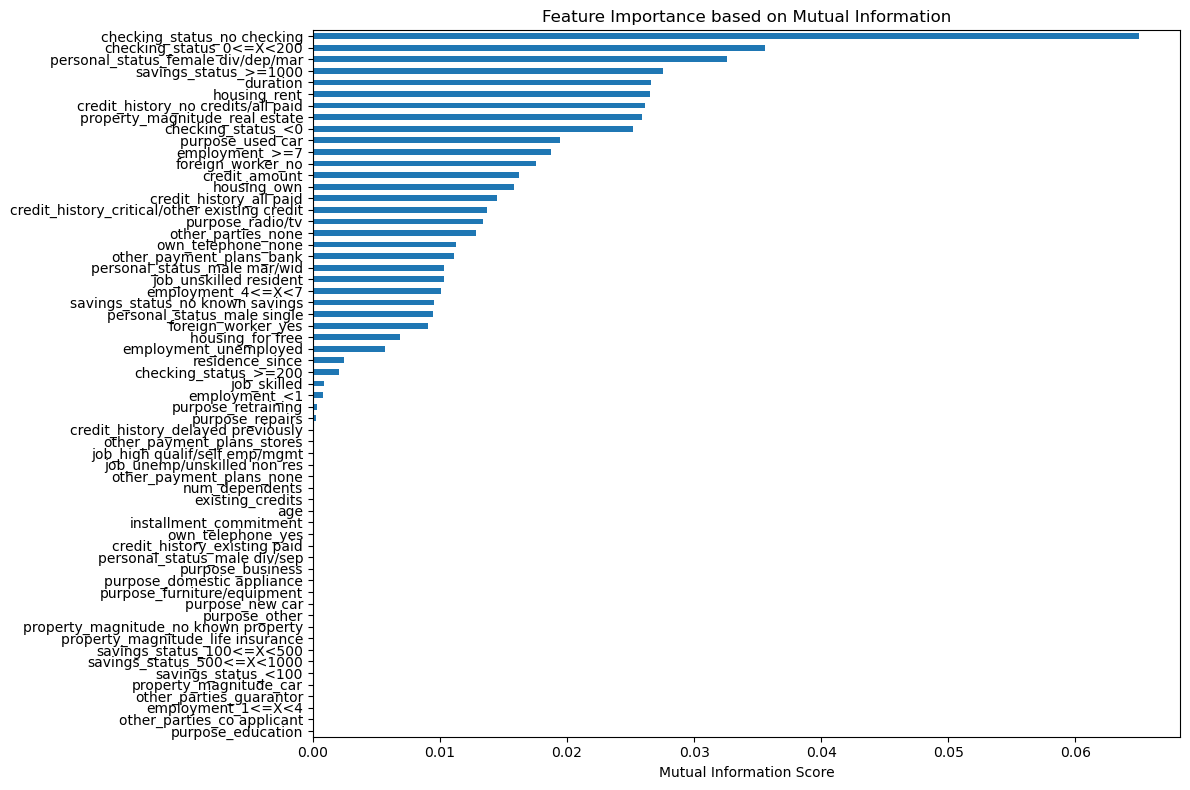

In [21]:
plt.figure(figsize=(12, 8))
mi_scores.sort_values(ascending=True).plot.barh()
plt.title('Feature Importance based on Mutual Information')
plt.xlabel('Mutual Information Score')
plt.tight_layout()
plt.show()

## Combine selected features from different methods

In [22]:
all_selected_features = set(high_variance_features + mi_selected_features + chi2_selected_features + f_selected_features + fpr_selected_features)
print(f"\nTotal unique features selected across all methods: {len(all_selected_features)}")


Total unique features selected across all methods: 45


## Create final feature set

In [23]:
X_train_selected = X_train[list(all_selected_features)]
X_test_selected = X_test[list(all_selected_features)]
print(f"\nFinal feature set shape: {X_train_selected.shape}")


Final feature set shape: (800, 45)


# Task 2: Feature Transformation

In [24]:
print("\n--- Task 2: Feature Transformation ---")
df = pd.read_csv(FILE_PATH_FE_CREDIT_CUSTOMERS)
print("Initial Dataset:\n")
df.head()


--- Task 2: Feature Transformation ---
Initial Dataset:



,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


## Apply transformations

### 1. Applying log Transformation

In [25]:
df['log_credit_amount'] = np.log1p(df['credit_amount'])
print("After Log Transformation:\n")
df[['credit_amount', 'log_credit_amount']].head()

After Log Transformation:



,credit_amount,log_credit_amount
0,1169.0,7.064759
1,5951.0,8.691483
2,2096.0,7.648263
3,7882.0,8.972464
4,4870.0,8.491055


The log transformation applied to the credit_amount column has transformed the data to a logarithmic scale using np.log1p, which is useful for stabilizing variance and normalizing skewed data. The output shows that the log-transformed values (log_credit_amount) now range from approximately 7.06 to 8.97, representing a compressed scale compared to the original credit_amount. This transformation helps in improving the interpretability of data and can enhance the performance of various statistical models.

### 2. Applying Standardization

In [28]:
scaler = StandardScaler()
df['standardized_age'] = scaler.fit_transform(df[['age']])
print("After Standardization:\n")
df[['age', 'standardized_age']].head()

After Standardization:



,age,standardized_age
0,67.0,2.766456
1,22.0,-1.191404
2,49.0,1.183312
3,45.0,0.831502
4,53.0,1.535122


Standardization centers the data around zero with a standard deviation of one. In this case, ages have been transformed to have a mean of zero and a standard deviation of one. For example, an age of 67 is now represented by a standardized score of approximately 2.77, indicating it is significantly above the average age in the dataset.

### 3. Applying Normalization

In [29]:
minmax_scaler = MinMaxScaler()
df['normalized_duration'] = minmax_scaler.fit_transform(df[['duration']])
print("After Normalization:\n")
df[['duration', 'normalized_duration']].head()

After Normalization:



,duration,normalized_duration
0,6.0,0.029412
1,48.0,0.647059
2,12.0,0.117647
3,42.0,0.558824
4,24.0,0.294118


Min-Max normalization scales data to a range between 0 and 1. The values in the normalized_duration column represent the proportion of duration relative to the minimum and maximum values in the original column. For instance, a duration of 6 has been scaled to approximately 0.03, meaning it is near the minimum value in the dataset.

### 4. Applying MaxAbs Scaling

In [30]:
maxabs_scaler = MaxAbsScaler()
df['maxabs_scaled_installment_commitment'] = maxabs_scaler.fit_transform(df[['installment_commitment']])
print("After MaxAbs Scaling:\n")
df[['installment_commitment', 'maxabs_scaled_installment_commitment']].head()

After MaxAbs Scaling:



,installment_commitment,maxabs_scaled_installment_commitment
0,4.0,1.00
1,2.0,0.50
2,2.0,0.50
3,2.0,0.50
4,3.0,0.75


MaxAbs Scaling scales data to the range [-1, 1] based on the maximum absolute value in the data. Here, the values are scaled relative to the maximum value in the installment_commitment column. For example, a commitment of 4 is scaled to 1.00, indicating it is the highest value in this column.

### 5. Applying Robust Scaling

In [31]:
robust_scaler = RobustScaler()
df['robust_scaled_residence_since'] = robust_scaler.fit_transform(df[['residence_since']])
print("After Robust Scaling:\n")
df[['residence_since', 'robust_scaled_residence_since']].head()

After Robust Scaling:



,residence_since,robust_scaled_residence_since
0,4.0,0.5
1,2.0,-0.5
2,3.0,0.0
3,4.0,0.5
4,4.0,0.5


Robust scaling uses the median and the interquartile range (IQR) to scale the data, making it robust to outliers. The robust_scaled_residence_since values reflect deviations from the median residence time. For example, a residence time of 4 years is scaled to 0.5, indicating it is slightly above the median value.

### 6. Applying Normalization

In [32]:
normalizer = Normalizer()
df['unit_vector_scaled_credit_amount'] = normalizer.fit_transform(df[['credit_amount']])
print("After Unit Vector Scaling:\n")
df[['credit_amount', 'unit_vector_scaled_credit_amount']].head()

After Unit Vector Scaling:



,credit_amount,unit_vector_scaled_credit_amount
0,1169.0,1.0
1,5951.0,1.0
2,2096.0,1.0
3,7882.0,1.0
4,4870.0,1.0


It normalizes the 'credit_amount' column and creates a new column 'unit_vector_scaled_credit_amount'. However, the output shows all values in the new column are 1.0. This is because normalizing a single column results in dividing each value by itself, yielding 1.0 for every value. Normalization is typically used for multi-dimensional data, not single columns.

# Task 3: Feature Creation

In [33]:
print("\n--- Task 3: Feature Creation ---")
print("Initial Dataset:\n")
df.head()


--- Task 3: Feature Creation ---
Initial Dataset:



,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,num_dependents,own_telephone,foreign_worker,class,log_credit_amount,standardized_age,normalized_duration,maxabs_scaled_installment_commitment,robust_scaled_residence_since,unit_vector_scaled_credit_amount
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,1.0,yes,yes,good,7.064759,2.766456,0.029412,1.00,0.5,1.0
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,1.0,none,yes,bad,8.691483,-1.191404,0.647059,0.50,-0.5,1.0
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,2.0,none,yes,good,7.648263,1.183312,0.117647,0.50,0.0,1.0
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,2.0,none,yes,good,8.972464,0.831502,0.558824,0.50,0.5,1.0
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,2.0,none,yes,bad,8.491055,1.535122,0.294118,0.75,0.5,1.0


## Create new features by combining or modifying existing ones

In [34]:
df['interaction_term'] = df['duration'] * df['credit_amount']
df['age_credit_ratio'] = df['age'] / df['credit_amount']
print("After Feature Creation:\n")
df[['duration', 'credit_amount', 'interaction_term', 'age', 'age_credit_ratio']].head()

After Feature Creation:



,duration,credit_amount,interaction_term,age,age_credit_ratio
0,6.0,1169.0,7014.0,67.0,0.057314
1,48.0,5951.0,285648.0,22.0,0.003697
2,12.0,2096.0,25152.0,49.0,0.023378
3,42.0,7882.0,331044.0,45.0,0.005709
4,24.0,4870.0,116880.0,53.0,0.010883


# Task 4: Polynomial Features

In [35]:
print("\n--- Task 4: Polynomial Features ---")
df = pd.read_csv(FILE_PATH_FRAUD_DETECTION)
print("Initial Dataset:\n")
df.head()


--- Task 4: Polynomial Features ---
Initial Dataset:



,Unnamed: 0,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,...,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,targets
0,0,9,1354,0,18,0,1,7,9,0,...,0,0,0,1,1,0,0,0,49,1
1,1,0,239,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,55,1
2,2,0,260,0,4,0,3,6,0,0,...,0,0,0,1,1,0,0,0,56,1
3,3,17,682,0,1,0,0,8,17,0,...,0,1,0,1,1,0,0,0,65,1
4,4,1,540,0,2,0,1,7,1,0,...,0,0,0,1,1,0,0,0,175,1


## Select numerical features

In [36]:
numerical_features = df.select_dtypes(include=[np.number])

poly = PolynomialFeatures(degree=2)
poly_features = poly.fit_transform(numerical_features)
poly_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(numerical_features.columns))
print("Polynomial Features:\n")
poly_df.head()

Polynomial Features:



,1,Unnamed: 0,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,...,col_109^2,col_109 col_110,col_109 col_111,col_109 targets,col_110^2,col_110 col_111,col_110 targets,col_111^2,col_111 targets,targets^2
0,1.0,0.0,9.0,1354.0,0.0,18.0,0.0,1.0,7.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2401.0,49.0,1.0
1,1.0,1.0,0.0,239.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3025.0,55.0,1.0
2,1.0,2.0,0.0,260.0,0.0,4.0,0.0,3.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3136.0,56.0,1.0
3,1.0,3.0,17.0,682.0,0.0,1.0,0.0,0.0,8.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4225.0,65.0,1.0
4,1.0,4.0,1.0,540.0,0.0,2.0,0.0,1.0,7.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30625.0,175.0,1.0


# Task 5: Handling Categorical Features

In [37]:
print("\n--- Task 5: Handling Categorical Features ---")
df = pd.read_csv(FILE_PATH_CARS)
print("Initial Dataset:\n")
df.head()


--- Task 5: Handling Categorical Features ---
Initial Dataset:



,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7


## One-Hot Encoding

In [38]:
one_hot_encoded_df = pd.get_dummies(df, columns=['manufacturer_name', 'model_name', 'transmission', 'color', 'engine_fuel', 'engine_type', 'body_type', 'state', 'drivetrain', 'location_region'])
print("After One-Hot Encoding:\n")
one_hot_encoded_df.head()

After One-Hot Encoding:



,odometer_value,year_produced,engine_has_gas,engine_capacity,has_warranty,price_usd,is_exchangeable,number_of_photos,up_counter,feature_0,...,state_owned,drivetrain_all,drivetrain_front,drivetrain_rear,location_region_Брестская обл.,location_region_Витебская обл.,location_region_Гомельская обл.,location_region_Гродненская обл.,location_region_Минская обл.,location_region_Могилевская обл.
0,190000,2010,False,2.5,False,10900.00,False,9,13,False,...,True,True,False,False,False,False,False,False,True,False
1,290000,2002,False,3.0,False,5000.00,True,12,54,False,...,True,True,False,False,False,False,False,False,True,False
2,402000,2001,False,2.5,False,2800.00,True,4,72,False,...,True,True,False,False,False,False,False,False,True,False
3,10000,1999,False,3.0,False,9999.00,True,9,42,True,...,True,True,False,False,False,False,False,False,True,False
4,280000,2001,False,2.5,False,2134.11,True,14,7,False,...,True,True,False,False,False,False,True,False,False,False


One-hot encoding transformed categorical features into numerous binary columns.<br>

Original categorical columns were converted into multiple binary columns. <br>
Each binary column represents a unique category within its respective feature.<br>
Dataset dimensions expanded significantly from original to 1240 columns.<br>
New binary columns can be used as numerical features for modeling.

## Label Encoding

In [39]:
label_encoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])
print("After Label Encoding:\n")
df.head()

After Label Encoding:



,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,45,764,0,8,190000,2010,3,False,2,2.5,...,True,True,True,False,True,False,True,True,True,16
1,45,764,0,1,290000,2002,3,False,2,3.0,...,True,False,False,True,True,False,False,False,True,83
2,45,519,0,7,402000,2001,3,False,2,2.5,...,True,False,False,False,False,False,False,True,True,151
3,45,609,1,1,10000,1999,3,False,2,3.0,...,False,False,False,False,False,False,False,False,False,86
4,45,665,0,0,280000,2001,3,False,2,2.5,...,True,False,True,True,False,False,False,False,True,7


Categorical columns (manufacturer_name and model_name) were identified and processed.<br>
Unique categories within each column (Ford, Toyota, Honda, Chevrolet; F-150, Camry, Civic, Escape, Cruze) were assigned numerical labels (0, 1, 2, 3; 0, 1, 2, 3, 4).<br>
Original textual values were replaced with corresponding numerical codes in the DataFrame.<br>
Column	Encoded Values<br>
manufacturer_name	0, 1, 2, 3<br>
model_name	0, 1, 2, 3, 4<br><br>


Dataset now contains only numerical data, suitable for some machine learning algorithms.<br>
Potential drawback: Assigned numerical values might imply an order, which might not be accurate for categorical data (e.g., 0 for Ford is not 'better' than 3 for Chevrolet).

## Target Encoding (Example using mean target value for each category)

In [40]:
target_mean = df.groupby('manufacturer_name')['price_usd'].mean()
df['target_encoded_manufacturer_name'] = df['manufacturer_name'].map(target_mean)
print("After Target Encoding:\n")
df[['manufacturer_name', 'target_encoded_manufacturer_name']].head()

After Target Encoding:



,manufacturer_name,target_encoded_manufacturer_name
0,45,7522.094605
1,45,7522.094605
2,45,7522.094605
3,45,7522.094605
4,45,7522.094605


The average 'price_usd' for each 'manufacturer_name' was calculated.<br>
A new column 'target_encoded_manufacturer_name' was created.<br>
Original 'manufacturer_name' values were replaced with their corresponding mean prices.<br>
This transformation incorporates label information into a numerical feature.<br>
Potential for overfitting if not handled carefully (e.g., using cross-validation).